In [1]:
import pandas as pd

In [2]:
aisles = pd.read_csv(r"C:\Users\PC\Desktop\Retail RAG\Data\aisles.csv")
aisles.head()

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [3]:
departments = pd.read_csv(r"C:\Users\PC\Desktop\Retail RAG\Data\departments.csv")
departments.head()

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [4]:
products_prior = pd.read_csv(r"C:\Users\PC\Desktop\Retail RAG\Data\order_products__prior.csv")
products_prior.head()

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [5]:
products_train = pd.read_csv(r"C:\Users\PC\Desktop\Retail RAG\Data\order_products__train.csv")
products_train.head()

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


In [6]:
orders = pd.read_csv(r"C:\Users\PC\Desktop\Retail RAG\Data\orders.csv")
orders.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [7]:
products = pd.read_csv(r"C:\Users\PC\Desktop\Retail RAG\Data\products.csv")
products.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [8]:
products_aisle_department = pd.merge(products,aisles,how='left',on='aisle_id')
print(len(products))
print(len(products_aisle_department))

49688
49688


In [9]:
products_aisle_department = pd.merge(products_aisle_department,departments,how='left',on='department_id')
print(len(products_aisle_department))

49688


In [10]:
products_aisle_department.head()

,product_id,product_name,aisle_id,department_id,aisle,department
0,1,Chocolate Sandwich Cookies,61,19,cookies cakes,snacks
1,2,All-Seasons Salt,104,13,spices seasonings,pantry
2,3,Robust Golden Unsweetened Oolong Tea,94,7,tea,beverages
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1,frozen meals,frozen
4,5,Green Chile Anytime Sauce,5,13,marinades meat preparation,pantry


In [11]:
products_aisle_department['aisle'].isna().sum()

0

In [12]:
products_prior['order_id'].value_counts()

order_id
1564244    145
790903     137
61355      127
2970392    121
2069920    116
          ... 
118997       1
118995       1
1119343      1
870412       1
2530309      1
Name: count, Length: 3214874, dtype: int64

In [13]:
products_train['order_id'].value_counts()

order_id
1395075    80
2813632    80
949182     77
2869702    76
341238     76
           ..
1144944     1
1144765     1
1144608     1
1144038     1
3214874     1
Name: count, Length: 131209, dtype: int64

In [14]:
order_products = pd.concat(
    [products_prior, products_train],
    axis=0,
    ignore_index=True
)

print(len(order_products))
print(order_products.head())

33819106
   order_id  product_id  add_to_cart_order  reordered
0         2       33120                  1          1
1         2       28985                  2          1
2         2        9327                  3          0
3         2       45918                  4          1
4         2       30035                  5          0


In [15]:
order_products['reordered'].value_counts()

reordered
1    19955360
0    13863746
Name: count, dtype: int64

In [16]:
order_products = pd.merge(order_products,orders,how='left',on='order_id')
print(len(order_products))

33819106


In [17]:
reorder_rate = order_products.groupby('product_id')['reordered'].mean().reset_index()
reorder_rate.rename(columns={'reordered': 'reorder_rate'},inplace=True)
order_products.head()

,order_id,product_id,add_to_cart_order,reordered,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2,33120,1,1,202279,prior,3,5,9,8.0
1,2,28985,2,1,202279,prior,3,5,9,8.0
2,2,9327,3,0,202279,prior,3,5,9,8.0
3,2,45918,4,1,202279,prior,3,5,9,8.0
4,2,30035,5,0,202279,prior,3,5,9,8.0


In [18]:
products_enriched = products_aisle_department.merge(reorder_rate, on='product_id', how='left')
print(products_enriched.head())

   product_id                                       product_name  aisle_id  \
0           1                         Chocolate Sandwich Cookies        61   
1           2                                   All-Seasons Salt       104   
2           3               Robust Golden Unsweetened Oolong Tea        94   
3           4  Smart Ones Classic Favorites Mini Rigatoni Wit...        38   
4           5                          Green Chile Anytime Sauce         5   

   department_id                       aisle department  reorder_rate  
0             19               cookies cakes     snacks      0.614627  
1             13           spices seasonings     pantry      0.138298  
2              7                         tea  beverages      0.738516  
3              1                frozen meals     frozen      0.458689  
4             13  marinades meat preparation     pantry      0.625000  


In [19]:
from collections import defaultdict

orders_products_list = order_products.groupby('order_id')['product_id'].apply(list)

bought_together = defaultdict(lambda : defaultdict(int))
for products_in_order in orders_products_list:
    for i, p1 in enumerate(products_in_order):
        for j, p2 in enumerate(products_in_order):
            if p1 != p2:
                bought_together[p1][p2] += 1

top_co_purchased = {}
for product, co_dict in bought_together.items():
    top_products = sorted(co_dict.items(), key=lambda x: x[1], reverse=True)[:3]
    top_co_purchased[product] = [p for p, count in top_products]

products_enriched = products_aisle_department.copy()
products_enriched['bought_together'] = products_enriched['product_id'].map(top_co_purchased)

In [20]:
products_enriched = (
    products_enriched
    .merge(
        order_products.groupby('product_id')['add_to_cart_order']
        .mean()
        .reset_index(name='avg_cart_position'),
        on='product_id',
        how='left'
    )
    .merge(
        order_products.groupby('product_id')['order_hour_of_day']
        .mean()
        .reset_index(name='avg_order_hour'),
        on='product_id',
        how='left'
    )
    .merge(
        order_products.groupby('product_id')
        .size()
        .reset_index(name='total_orders'),
        on='product_id',
        how='left'
    )
    .merge(
        order_products.groupby('product_id')['order_dow']
        .mean()
        .reset_index(name='avg_order_day'),
        on='product_id',
        how='left'
    )
    .merge(
        order_products.groupby('product_id')['user_id']
        .nunique()
        .reset_index(name='unique_users'),
        on='product_id',
        how='left'
    )
)


In [21]:
products_enriched.head()

,product_id,product_name,aisle_id,department_id,aisle,department,bought_together,avg_cart_position,avg_order_hour,total_orders,avg_order_day,unique_users
0,1,Chocolate Sandwich Cookies,61,19,cookies cakes,snacks,"[6184, 11759, 16797]",5.845954,13.227178,1928.0,2.786307,743.0
1,2,All-Seasons Salt,104,13,spices seasonings,pantry,"[13176, 21903, 28204]",10.138298,13.308511,94.0,2.882979,81.0
2,3,Robust Golden Unsweetened Oolong Tea,94,7,tea,beverages,"[13176, 25013, 40656]",6.374558,12.130742,283.0,2.756184,74.0
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1,frozen meals,frozen,"[4846, 24852, 49275]",9.472934,13.811966,351.0,2.686610,190.0
4,5,Green Chile Anytime Sauce,5,13,marinades meat preparation,pantry,"[2846, 7676, 17038]",6.375000,10.812500,16.0,2.875000,6.0


In [25]:
cols = [
    "unique_users",
    "total_orders",
    "avg_order_day",
    "avg_order_hour",
    "avg_cart_position"
]

products_enriched[cols].describe(percentiles=[0.1, 0.25, 0.5, 0.75, 0.9])


,unique_users,total_orders,avg_order_day,avg_order_hour,avg_cart_position
count,49685.000000,49685.000000,49685.000000,49685.000000,49685.000000
mean,279.032827,680.670343,2.858285,13.510163,9.117733
std,1358.633922,4987.769425,0.494089,1.031564,2.519844
min,1.000000,1.000000,0.000000,0.000000,1.000000
10%,6.000000,8.000000,2.384615,12.450000,6.161290
25%,12.000000,18.000000,2.639706,13.078029,7.666667
50%,37.000000,63.000000,2.821990,13.500000,9.080000
75%,144.000000,272.000000,3.056738,13.942446,10.372222
90%,511.000000,1066.000000,3.400000,14.589744,11.855496
max,76125.000000,491291.000000,6.000000,23.000000,53.000000


array([[<Axes: title={'center': 'unique_users'}>,
        <Axes: title={'center': 'total_orders'}>],
       [<Axes: title={'center': 'avg_order_day'}>,
        <Axes: title={'center': 'avg_order_hour'}>],
       [<Axes: title={'center': 'avg_cart_position'}>, <Axes: >]],
      dtype=object)

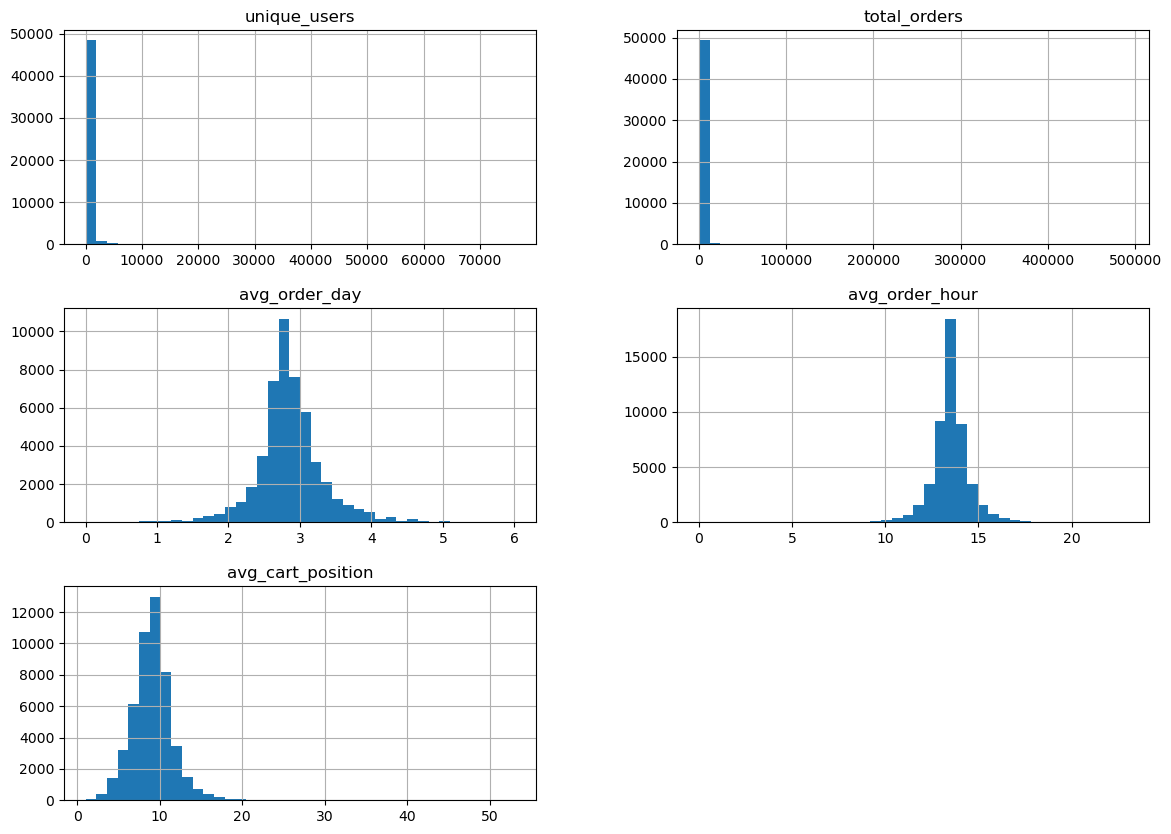

In [26]:
products_enriched[cols].hist(bins=40, figsize=(14, 10))


In [1]:
def days(x):
    if x in [1,2]:
        return "Early week"
    elif x in [3,4]:
        return "Mid week"
    else :
        return "Weekend"
    
orders["day_wise_segment"] = orders["order_dow"].apply(days)

def hours(x):
    if x <= 6:
        return "morning"
    if x <=12 :
        return "afternoon"
    if x <=18 :
        return "evening"
    else :
        return "night"
    
orders["hour_wise_segment"] = orders["order_hour_of_day"].apply(hours)

NameError: name 'orders' is not defined

In [24]:
print(products_enriched['avg_order_day'].value_counts().min())
print(products_enriched['avg_order_day'].value_counts().max())

1
1245


In [ ]:
import pandas as pd
import numpy as np

p25_cart = products_enriched["avg_cart_position"].quantile(0.25)
p75_cart = products_enriched["avg_cart_position"].quantile(0.75)

def cart_position_bucket(pos, p25, p75):
    if pos <= p25:
        return "early"
    elif pos >= p75:
        return "late"
    return "mid"

products_enriched["cart_position_segment"] = products_enriched["avg_cart_position"].apply(lambda x: cart_position_bucket(x, p25_cart, p75_cart))

In [ ]:
products_enriched["log_total_orders"] = np.log1p(products_enriched["total_orders"])

p25_orders = products_enriched["log_total_orders"].quantile(0.25)
p75_orders = products_enriched["log_total_orders"].quantile(0.75)

def popularity_bucket(orders, p25, p75):
    if orders <= p25:
        return "low"
    elif orders >= p75:
        return "high"
    return "moderate"

products_enriched["popularity_segment"] = products_enriched["log_total_orders"].apply(lambda x: popularity_bucket(x, p25_orders, p75_orders))



In [ ]:
products_enriched["orders_per_user"] = products_enriched["total_orders"] / products_enriched["unique_users"]
p25 = products_enriched["orders_per_user"].quantile(0.25)
p75 = products_enriched["orders_per_user"].quantile(0.75)

def user_behavior_bucket(x):
    if x <= p25:
        return "broad-user"       
    elif x >= p75:
        return "repeat-driven"     
    else:
        return "mixed"

products_enriched["user_segment"] = products_enriched["orders_per_user"].apply(user_behavior_bucket)

products_enriched.drop(columns=["orders_per_user"], inplace=True)

SyntaxError: invalid syntax (1257988772.py, line 2)

In [ ]:
id_to_name = dict(zip(products_enriched['product_id'], products_enriched['product_name']))

def ids_to_names(id_list):
    names = []
    for i in id_list:
        names.append(id_to_name[i])
    return names

products_enriched['bought_together_names'] = products_enriched['bought_together'].apply(ids_to_names)